# **PRÁCTICA 3:  Machine Learning - Parte 2:  Active Learning**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

<div align="center"><img src="active_learning.png" width="400" alt="Active Learning"></div>

En active learning tenemos los siguientes elementos:
- Un conjunto de entrenamiento con muestras etiquetadas (conocemos su clase) inicialmente pequeño
- Un modelo que se va entrenando de manera iterativa
- Un conjunto grande de muestras (*pool*) cuya clase se desconoce inicialmente (no etiquetado)
- Un estrategia que a partir del estado actual del modelo escoge las mejores muestras no etiquetadas para preguntar su etiqueta a un experto
- Un experto capaz de proporcionar la etiqueta (clase) cuando se le pregunta

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.svm import SVC
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.decomposition import PCA
# Custom Active Learning class
from AL import AL

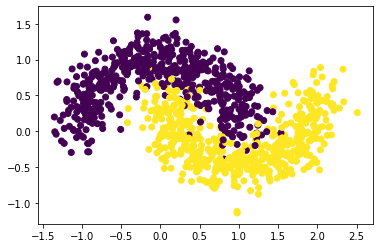

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=y, marker='o'); #c=y

## Preparamos los modelos random y active

In [ ]:
# Setup, que depende del AL.py
test_size = 0.3
labeled_size = len(np.unique(y))

# AL Variables
num_queries = 100
query_points = 1

# Setup random and active objects
random = AL()
xtest, ytest = random.setup(X, y, labeled_size=labeled_size, test_size=test_size)
active = random.copy()

## Most uncertain, aka margin sampling in SVM
En el modelo activo seleccionamos las muestras del *pool* más cercanas al hiperplano de separación entre clases.
## Ejercicio
Completa el código e implementa la estrategia AL

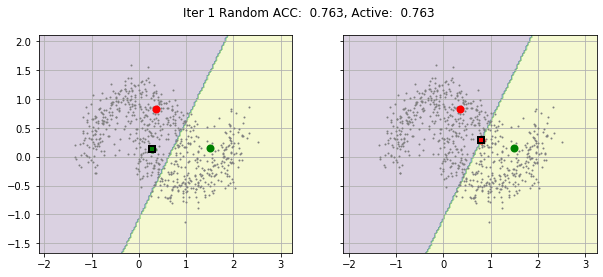

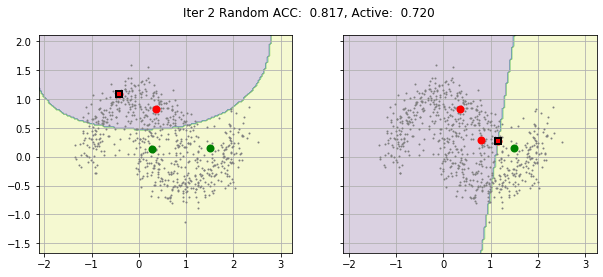

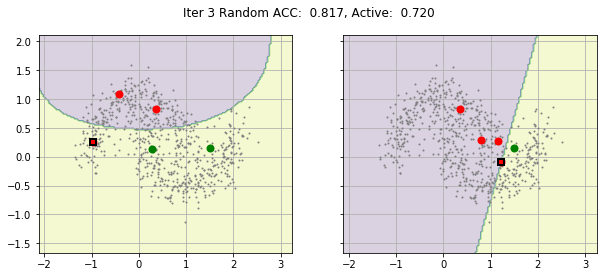

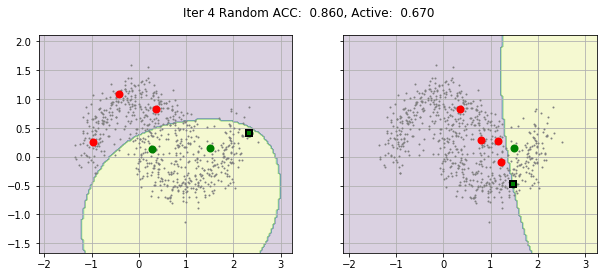

In [ ]:
# Visualicemos un poco el funcionamiento
for i in np.arange(0, 4):
    # 1. Fit random model
    random.fit()
    # 2. Obtain score on xtest, ytest
    accr = random.score(xtest, ytest)
    # 3. Choose some random samples from xunlab, yunlab
    idx = np.random.permutation(len(random.yunlab))[0:query_points]
    # 4. Use updateLabels to move them from pool to train
    random.updateLabels(idx)

    # Same for active model
    active.fit()
    acca = active.score(xtest, ytest)
    # 3. Use heuristic to choose samples from pool
    # Obtén las distancias de las muestras sin etiqueta (active.xunlab)
    # al hiperplano con active.classifier.decision_function
    dist = active.classifier.decision_function(active.xunlab)
    # Ordena la distancias de menor a mayor y escoge los primero query_points
    idx = np.argsort(np.abs(dist))[0:query_points]
    # Añade los muestras con los índices seleccionados al conjunto de entrenamiento
    active.updateLabels(idx)
    
    # Show results
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))
    random.makeplots(query_points, axes=ax[0])
    active.makeplots(query_points, axes=ax[1])
    fig.suptitle('Iter %d Random ACC: %6.3f, Active: %6.3f' % (i+1, accr, acca))

## Simulemos ahora un entrenamiento completo

In [ ]:
# Setup random and active objects
random = AL()
xtest, ytest = random.setup(X, y, labeled_size=labeled_size, test_size=test_size)
active = random.copy()

for i in np.arange(0, num_queries):
    # 1. Fit random model
    random.fit()
    # 2. Obtain score on xtest, ytest
    accr = random.score(xtest, ytest)
    # 3. Choose some random samples from xunlab, yunlab
    idx = np.random.permutation(len(random.yunlab))[0:query_points]
    # 4. Use updateLabels to move them from pool to train
    random.updateLabels(idx)

    # Same for active model, but
    active.fit()
    acca = active.score(xtest, ytest)
    # 3. Use heuristic to choose samples from pool
    dist = active.classifier.decision_function(active.xunlab)
    idx = np.argsort(np.abs(dist))[0:query_points]
    active.updateLabels(idx)
    
    # Report results
    print('Random ACC: %6.3f, Active: %6.3f' % (accr, acca))

Random ACC:  0.647, Active:  0.647
Random ACC:  0.750, Active:  0.777
Random ACC:  0.767, Active:  0.687
Random ACC:  0.580, Active:  0.717
Random ACC:  0.627, Active:  0.697
Random ACC:  0.620, Active:  0.623
Random ACC:  0.713, Active:  0.673
Random ACC:  0.923, Active:  0.680
Random ACC:  0.923, Active:  0.713
Random ACC:  0.923, Active:  0.713
Random ACC:  0.923, Active:  0.747
Random ACC:  0.923, Active:  0.747
Random ACC:  0.923, Active:  0.813
Random ACC:  0.923, Active:  0.820
Random ACC:  0.923, Active:  0.810
Random ACC:  0.923, Active:  0.817
Random ACC:  0.923, Active:  0.843
Random ACC:  0.923, Active:  0.860
Random ACC:  0.923, Active:  0.850
Random ACC:  0.907, Active:  0.870
Random ACC:  0.907, Active:  0.880
Random ACC:  0.907, Active:  0.863
Random ACC:  0.907, Active:  0.880
Random ACC:  0.907, Active:  0.867
Random ACC:  0.923, Active:  0.880
Random ACC:  0.923, Active:  0.870
Random ACC:  0.923, Active:  0.877
Random ACC:  0.913, Active:  0.877
Random ACC:  0.913, 

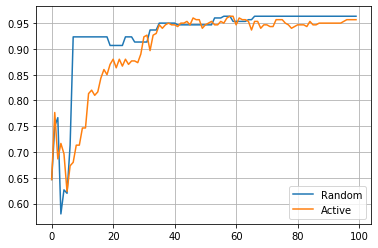

In [ ]:
# Comparamos gráficamente los resultados
ejex = np.arange(0, len(random.acc))
plt.plot(ejex, random.acc, label='Random')
plt.plot(ejex, active.acc, label='Active')
plt.grid(), plt.legend();

## Cuando la salida del modelo es una estimación de probabilidad
En caso de usar modelos cuya salida en lugar de ser una distancia es una estimación de la probabilidad de pertenecer a una u otra clase tendremos que adaptar la estrategia
## Ejercicio
Cambia el código para usar la estrategia *most uncertain* para salidas probabilísticas.

In [ ]:
# Setup random and active objects
random = AL()
xtest, ytest = random.setup(X, y, labeled_size=labeled_size, test_size=test_size, probability=True)
active = random.copy()

for i in np.arange(0, num_queries):
    # 1. Fit random model
    random.fit()
    
    # 2. Obtain score on xtest, ytest
    accr = random.score(xtest, ytest)
    
    # 3. Choose some random samples from xunlab, yunlab
    idx = np.random.permutation(len(random.yunlab))[0:query_points]
    
    # 4. Use updateLabels to move them from pool to train
    random.updateLabels(idx)
    
    # Same for active model, but
    active.fit()
    acca = active.score(xtest, ytest)
    
    # 3. Use heuristic to choose samples from pool
    dist = active.classifier.decision_function(active.xunlab)
    # Obtén las probabilidades de active.xunlab mediante
    prob = active.classifier.predict_proba(active.xunlab)
    prob = np.abs(prob[:,0]-0.5)
    # Busca y ordena de menor a mayor las muestras más inciertas
    idx = np.argsort(np.abs(dist))[0:query_points]
    # Actualizamos según los indices de las muestras seleccionadas
    active.updateLabels(idx)
    
    # Report results
    print('Random ACC: %6.3f, Active: %6.3f' % (accr, acca))

Random ACC:  0.877, Active:  0.877
Random ACC:  0.877, Active:  0.827
Random ACC:  0.860, Active:  0.823
Random ACC:  0.860, Active:  0.730
Random ACC:  0.860, Active:  0.680
Random ACC:  0.837, Active:  0.593
Random ACC:  0.880, Active:  0.613
Random ACC:  0.880, Active:  0.630
Random ACC:  0.880, Active:  0.677
Random ACC:  0.880, Active:  0.687
Random ACC:  0.880, Active:  0.707
Random ACC:  0.880, Active:  0.643
Random ACC:  0.880, Active:  0.657
Random ACC:  0.867, Active:  0.677
Random ACC:  0.867, Active:  0.670
Random ACC:  0.877, Active:  0.680
Random ACC:  0.877, Active:  0.670
Random ACC:  0.877, Active:  0.707
Random ACC:  0.877, Active:  0.703
Random ACC:  0.877, Active:  0.720
Random ACC:  0.920, Active:  0.753
Random ACC:  0.920, Active:  0.733
Random ACC:  0.910, Active:  0.760
Random ACC:  0.913, Active:  0.777
Random ACC:  0.913, Active:  0.800
Random ACC:  0.913, Active:  0.813
Random ACC:  0.930, Active:  0.803
Random ACC:  0.930, Active:  0.793
Random ACC:  0.930, 

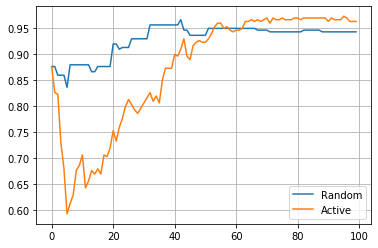

In [ ]:
# Comparación gráfica
ejex = np.arange(0, len(random.acc))
plt.plot(ejex, random.acc, label='Random')
plt.plot(ejex, active.acc, label='Active')
plt.grid(), plt.legend();

## Multiclass Level Uncertainty (MCLU) para problemas multiclase
En esta estrategia seleccionamos las muestras que estando más distantes del hiperplano de separación quedan más cercanas entre sí. La explicación intuitiva es que seleccionamos las muestras que dos o más modelos creen que les pertenecen. Esta estrategia requiere una estructura de clasificación OVR (one-vs-rest).

In [ ]:
data = load_iris()

In [ ]:
# Para las SVM y métodos kernel en general es clave normlizar los datos
from sklearn.preprocessing import MinMaxScaler
mmscale = MinMaxScaler(feature_range=(-1,1))
Xn = mmscale.fit_transform(data.data)
yn = data.target

labeled_size = len(np.unique(yn))
test_size = 0.3

## Ejercicio
Modifica el siguiente código para implementar la estrategía MCLU

In [ ]:
# Setup random and active objects
random = AL()
xtest, ytest = random.setup(Xn, yn, labeled_size=labeled_size, test_size=test_size)
active = random.copy()

for i in np.arange(0, num_queries):
    # 1. Fit random model
    random.fit()
    # 2. Obtain score on xtest, ytest
    accr = random.score(xtest, ytest)
    # 3. Choose some random samples from xunlab, yunlab
    idx = np.random.permutation(len(random.yunlab))[0:query_points]
    # 4. Use updateLabels to move them from pool to train
    random.updateLabels(idx)

    # Same for active model, but
    active.fit()
    acca = active.score(xtest, ytest)

    # 3. Use heuristic to choose samples from pool
    dist = active.classifier.decision_function(active.xunlab)
    # Obtén todas las distancias y ordena según la estrategia MCLU
    dsort = np.sort(dist, axis = 1)
    idx = np.argsort(dsort[:,-1] - dsort[:,-2])[0:query_points]
    # Actualizamos 
    active.updateLabels(idx)
    
    # Report results
    print('Random ACC: %6.3f, Active: %6.3f' % (accr, acca))

Random ACC:  0.889, Active:  0.889
Random ACC:  0.933, Active:  0.889
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.933, Active:  0.911
Random ACC:  0.956, Active:  0.911
Random ACC:  0.956, Active:  0.911
Random ACC:  0.956, Active:  0.911
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, Active:  0.933
Random ACC:  0.956, 

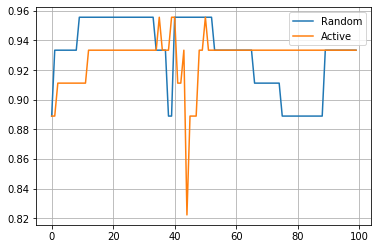

In [ ]:
# Mostramos gráficamente
ejex = np.arange(0, len(random.acc))
plt.plot(ejex, random.acc, label='Random')
plt.plot(ejex, active.acc, label='Active')
plt.grid(), plt.legend();

## Ejercicio
Crea el código para implementar la estrategia MCLU para clasificadores con salida probabilística.

In [ ]:
# Setup random and active objects
random = AL()
xtest, ytest = random.setup(Xn, yn, labeled_size=labeled_size, test_size=test_size)
active = random.copy()

for i in np.arange(0, num_queries):
    # 1. Fit random model
    random.fit()
    # 2. Obtain score on xtest, ytest
    accr = random.score(xtest, ytest)
    # 3. Choose some random samples from xunlab, yunlab
    idx = np.random.permutation(len(random.yunlab))[0:query_points]
    # 4. Use updateLabels to move them from pool to train
    random.updateLabels(idx)

    # Same for active model, but
    active.fit()
    acca = active.score(xtest, ytest)

    # 3. Use heuristic to choose samples from pool
    dist = active.classifier.decision_function(active.xunlab)
    # Obtén todas las distancias y ordena según la estrategia MCLU
    dsort = np.sort(dist, axis = 1)
    # Obtén las probabilidades de active.xunlab mediante
    prob = active.classifier.predict_proba(active.xunlab)
    prob = np.abs(prob[:,0]-0.5)
    # Busca y ordena de menor a mayor las muestras más inciertas
    idx = np.argsort(np.abs(dist))[0:query_points]
    # Actualizamos según los indices de las muestras seleccionadas
    active.updateLabels(idx)